<a href="https://colab.research.google.com/github/vedha-224/DL/blob/main/Minor_project_Handwritten_Digit_Classificatoion_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Handwritten Digit Classification using Deep Learning (Neural Network)

import the Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST data from keras.datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
#shape of numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


1.Training data= 60,000 images   
2.Testing data = 10,000 images
3.each image dimenisons= 28x28
4.Grayscale images---> channel=1

In [ ]:
#printing 10 th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


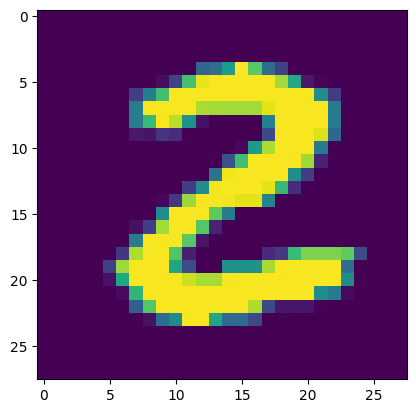

2


In [ ]:
#displaying the image
plt.imshow(x_train[25])
plt.show()

#print the corresponding label
print(y_train[25])

image_labels

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in y_train
print(np.unique(y_train))

#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use this labels as such or we can also apply one Hot Encoding

All the images have the same dimesnisons in this dataset, if not , we have to resize all the images to a common dimension

In [ ]:
# scaling the values

x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
#setting up layerd of the neural networks

model=keras.Sequential([
                        keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28,28,1)),
                        keras.layers.MaxPooling2D(pool_size=(2, 2)),
                        keras.layers.Conv2D(64, (5, 5), activation='relu'),
                        keras.layers.MaxPooling2D(pool_size=(2, 2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(64,activation='relu'),#64 is no of neurons in this layer
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')#10 indicates no of classes / no of neurons oin output layer
])

In [ ]:
#compiling the neural network

model.compile(optimizer='adam',# detrmines the most optimum parameters
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the neural network

model.fit(x_train,y_train,epochs=10)#epoch-->how many times neural n/w must go through the data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.9046 - loss: 0.3021
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 37ms/step - accuracy: 0.9844 - loss: 0.0515
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9899 - loss: 0.0322
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9926 - loss: 0.0238
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9932 - loss: 0.0206
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9945 - loss: 0.0169
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - accuracy: 0.9956 - loss: 0.0143
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9957 - loss: 0.0134
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9956 - loss: 0.0128
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 38ms/step - accuracy: 0.9971 - loss: 0.0083


Training data accuracy= 98.98 %

**ACCURACY ON TEST DATA :**

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9880 - loss: 0.0558
0.9909999966621399


Test data accuracy = 96.75%

In [ ]:
print(x_test.shape)

(10000, 28, 28)


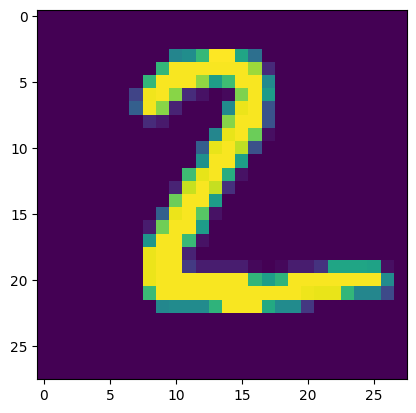

In [ ]:
#first data point in x-test
plt.imshow(x_test[1])
plt.show()

In [ ]:
print(y_test[1])

2


In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[1])

[1.1914872e-13 5.3018764e-14 9.9999994e-01 1.6967798e-15 3.0104950e-14
 1.8912994e-15 7.2779998e-14 3.9154869e-13 1.0376680e-11 9.2614558e-21]


model.predict() gived prediction probability of each class for that particular data point

In [ ]:
#converting prediction probabilities to class label

label_for_first_test_image = np.argmax(y_pred[1])
print(label_for_first_test_image)

2


In [ ]:
#converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 5, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test ---> True labels  

y_pred_labels ---> predicted labels

confusion matrix

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 972    0    0    0    1    2    4    1    0    0]
 [   0 1132    0    0    0    0    0    2    0    1]
 [   1    0 1024    0    0    0    0    7    0    0]
 [   0    0    1  998    0    5    0    3    1    2]
 [   0    0    0    0  977    0    0    0    2    3]
 [   0    0    0    2    0  889    1    0    0    0]
 [   1    3    0    0    5    2  946    0    1    0]
 [   0    2    2    0    0    0    0 1022    0    2]
 [   1    1    3    1    0    5    1    5  954    3]
 [   0    0    0    0    6    6    0    0    1  996]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

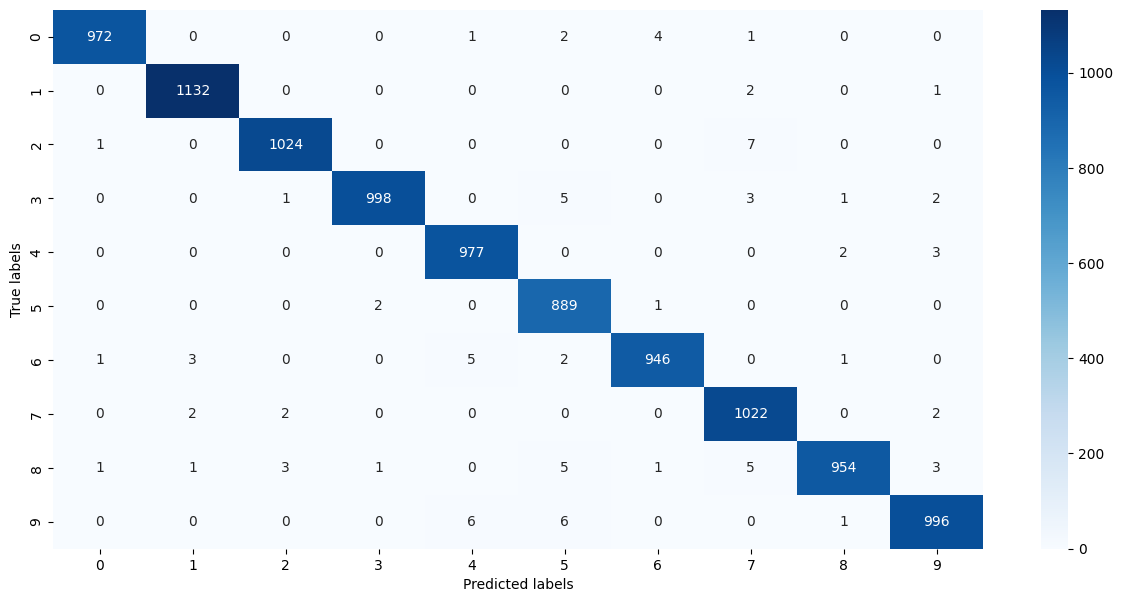

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

Building predictive system

In [ ]:
input_image_path='/content/mnist-3-0.png'

input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


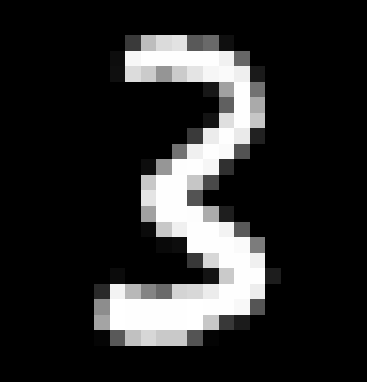

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(382, 367, 3)

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
print(grayscale.shape)

(382, 367)


In [ ]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshape=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(image_reshape)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[8.3664995e-14 3.8257905e-10 1.1415569e-11 1.0000000e+00 1.3238615e-13
  1.2756668e-08 1.7699081e-13 1.4247433e-09 2.6205600e-12 3.6119442e-08]]


In [ ]:
input_prediction_label=np.argmax(input_prediction)
print(input_prediction_label)

3


predictive system

path of image to be predicted: /content/mnist-8 - Copy.png


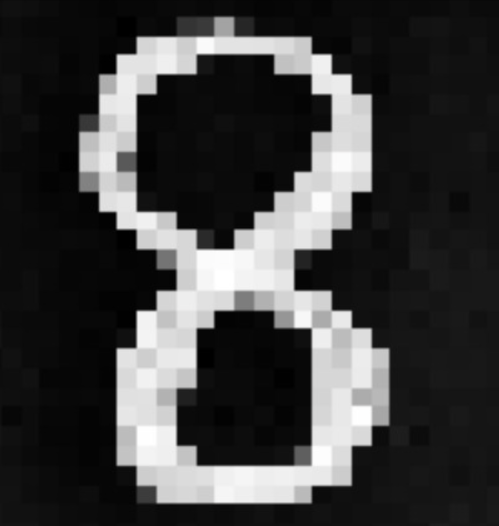

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
predicted label is:  8


In [ ]:
input_image_path=input('path of image to be predicted: ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshape=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshape)

input_prediction_label=np.argmax(input_prediction)

print('predicted label is: ',input_prediction_label)